# Part 1 - Linear Networks & Basic Optimization

###  **DSBA 6165: AI & Deep Learning**
### Minwoo "Jake" Lee

## Goal

The goal of this lab activity is practicing to build a simple linear network, apply basic optimization and play with autograd tools. For the practice, we use Auto MPG dataset and Iris dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

Along the way, we'll see how to build and train a linear network. Additionally, we will take a look at gradient descent which allows us to iteratively minimize the error (loss) and can help our network the optimal solution (linear). Additionally, we'll look at how we can use a automatic differention manually to understand its underlying behavior. We play with two diffrent datasets, one for regression and the other for classification.


## Loading Data

Let us first import the libraries we are going to use. TensorFlow for DL models, matplotlib for plotting data/results, numpy and pandas for data handling.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("TF version:", tf.__version__)
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


TF version: 2.19.0


### Auto-MPG Dataset

You can navigate [UCI auto-mpg data folder](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) to find [auto-mpg.data](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data). Click the link and take a look at the data before starting to work the following TODOs.


<img src="https://archive.ics.uci.edu/static/public/9/Thumbnails/Large.jpg?81" width=350 />


|  |  |  |  |  |  |
|---|---|---|---|---|---|
| Data Set Characteristics:&nbsp;&nbsp; | Multivariate | Number of Instances: | 398 | Area: | N/A |
| Attribute Characteristics: | Categorical, Real | Number of Attributes: | 8 | Date Donated | 1993-07-07 |
| Associated Tasks: | Regression | Missing Values? | Yes | Number of Web Hits: | 821244 |



The dataset contains the following attributes:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

Given the other attributes as input feature, we can train the model to predict mpg or hoursepower, etc.


### TODO1

1. Copy the auto-mpg.data url from above and define the variable `data_url`.
1. Load the auto-mpg dataset with the `data_url` provided below and store the output into `dfauto` using pandas `read_csv`.
    1. Hint: Make sure to include the data url variable.
    1. Hint: Use the read_csv reference here: [link](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
    1. Hint: When you load the data, check the file format (delimiter), non-numeric content, etc. to pass a proper parameters. Use options `names`, `na_values`, and `delim_whitespace`.  

In [ ]:
# TODO: copy and paste the url here
data_url =


# Feature names
colnames =


# TODO: read the data



# display the dfdauto
display(dfauto)

/tmp/ipython-input-3792927300.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfauto = pd.read_csv(data_url,


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


    
 ### TODO 1-1

Now we are Dropping the "car name" variable since it's an object which has many unique samples and not meaningfull for our findings
1. Drop the 'car name' variable from dataset using `drop`.
  1. HINT: you can find detailed documentation here :[pandas.DataFrame.drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

In [ ]:
# TODO:




,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


<Add sentences to explain>

Now we have dropped the 'car name' input. Now we should check whether the dataset contains any missing or improper values. We can use `isna` which return boolean values for the NA (or NaN, not a number) entries. `sum` function helps us count the number of NA values.


In [ ]:
df_data.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0


We are able to see six NA samples in the "horsepower" variable. Let's what samples they are:

In [ ]:
df_data[df_data['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


We now need to remove the NaN values from the dataset because machine learning algorithms cannot handle non-numerical values. Additionally, it may be challenging to visualize or understand the data when a dataset contains NaN values. Analyses can be made clearer and more precise by eliminating NaN values. Of course, there are other ways to handle this other than simple removal. If you are interested in more data preprocessing methods to handling missing values, you can review Applied Machine Learning class.


 ### TODO 1-2
1. Remove the data samples with NAs by using `dropna`. You can refer to this link for reference: [pandas.DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [ ]:
# TODO:




,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0


Now we are mapping `origin` variable values to individual categorical so It can make easier to understand the data and perform further analysis, Using map function to replace these numerical values with their corresponding category names.

Now let us update the origin to categorical variables of USA,EUROPE and JAPAN.


In [ ]:
df_data['origin'] = df_data['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df_data

/tmp/ipython-input-2231313680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['origin'] = df_data['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


Most of the algorithms can not handle non-numerical variables unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical variables are encoded. Then, why do we need to convert numerical values to characters? Let us review dummy values.


Dummy Encoding (a.k.a. one hot encoding) refers to an encoding strategy to convert a categorical feature to a numerical vector format.
In this method, we map each category to a binary vector that contains the numbers 1 and 0, signifying whether the feature is present or not. The number of feature categories affects how many vectors there are. When we have `origin` has 1, 2, and 3 for cars from USA, EUROPE, and JAPAN, relation between these number can cause an issue. For instance, 2 > 1, so EUROPE > USA. What does that mean. USA cars are closer (2-1) to EUROPE than JAPAN (3-1)? Breaking this releation with dummy variables is very helpful to boost learning as Yan Lecun discussed in [Efficient Backprop paper](https://cseweb.ucsd.edu/classes/wi08/cse253/Handouts/lecun-98b.pdf).


`pd.get_dummies` is a function from Pandas that performs dummy encoding in a single line of code. You can find detailed documentation here: [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

### TODO 1-3

1. Convert the column 'origin' to dummy variables.
  1. Hint: Don't forget to use prefix and prefix seperator to have same column names. Refer to the above link if you need.

In [ ]:
# TODO:




,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


In [ ]:
df_data['Europe'] = df_data['Europe'].astype(int)
df_data['Japan'] = df_data['Japan'].astype(int)
df_data['USA'] = df_data['USA'].astype(int)

In [ ]:
df_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


## Visualize the data
 Seaborn, a visualization library, helps to visualize data with many plotting functions. To understand how variables in a dataset are related to one another and how that relationship is dependent on other variables, we can run visual analysis. This helps to visualize the trends and identify various patterns in the dataset.

## Why Pairplot
In the context of building a simple linear regression model and working with the Auto MPG dataset, a pair plot can help in the following ways:

`Visualizing Relationships`: The pair plot provides a matrix of scatterplots for each pair of variables in the dataset. This can help identify any linear relationships or trends between the target variable (e.g., 'mpg') and the predictor variable (e.g., 'horsepower'). It also helps to visualize the distribution of each variable.

`Outlier Detection`: Scatterplots in the pair plot can reveal potential outliers. Outliers can have a significant impact on linear regression models, and identifying them is crucial for model robustness.

`Feature Selection`: If there are multiple predictor variables, the pair plot can help in selecting relevant features for the linear regression model. It allows you to visually inspect the relationships between the target variable and each predictor.

### TODO 2-1
1. Using the seaborn `pairplot` plot, visualize the relationship between the following variables ('mpg', 'cylinder', 'horsepower', 'weight', 'acceleration') using diag_kind as kernel density estimation "kde".

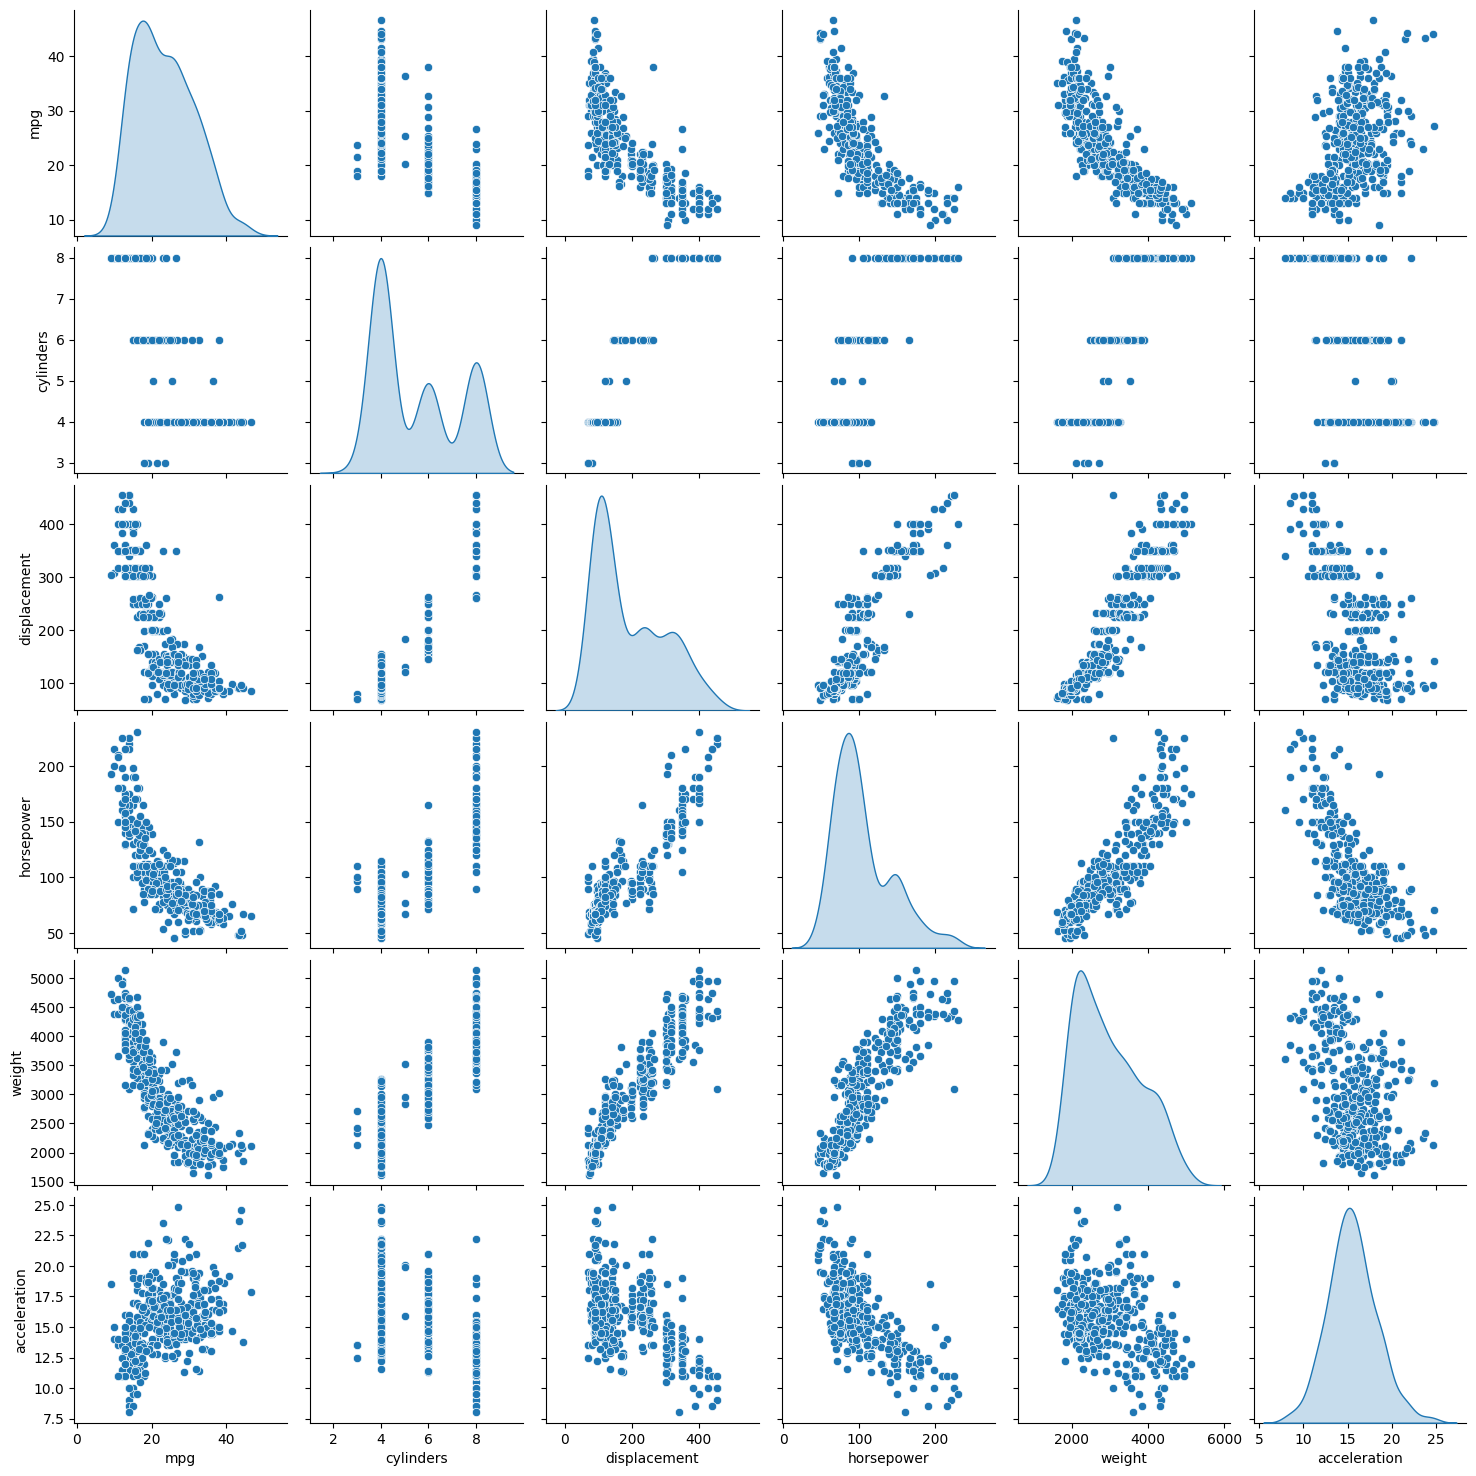

In [ ]:
# TODO: you code here



### TODO 2-2 Identify and explain the relationships you see in the pairplot?

#### TODO 2-2
-

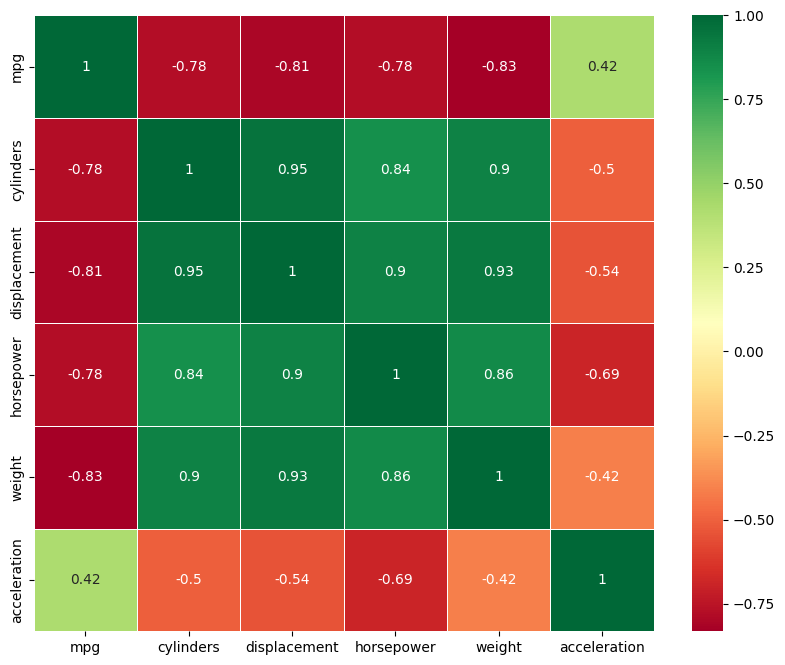

In [ ]:
# sns.heatmap(df_data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].corr, annot=True, cmap='RdYlGn', linewidths=0.5)
selected_columns = df_data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]

# Create a correlation matrix
corr = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.show()


## Data Split




Now we have to split the training and testing data because it allows us to estimate the model's performance on new data and ensure that the model is not overfitting, which is when a model performs well on the training data but poorly on new data. By evaluating the model's performance on unseen data, we can get a better understanding of how well the model will perform when used in practice.

In [ ]:
train_data = df_data.sample(frac=0.8, random_state=0)#Splitting the data(80% for training and 20% for testing)
test_data = df_data.drop(train_data.index)

In [ ]:
train_data.shape, test_data.shape

((314, 10), (78, 10))

The 'mpg' column is eliminated using the `pop` method. Refer to this link for `pop` method.[Link](https://python-reference.readthedocs.io/en/latest/docs/list/pop.html).
The reason for removing the output variable is we are essentially creating a dataset that only contains the input features, and not the target variable, for the testing set.
This is usually done when evaluating the performance of a model.

In [ ]:
x_train = train_data.copy()
x_test = test_data.copy()

y_train = x_train.pop('mpg')
y_test = x_test.pop('mpg')

In [ ]:
display(x_train)
display(x_test)
display(y_train)
display(y_test)

,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,4,83.0,61.0,2003.0,19.0,74,0,1,0


,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
9,8,390.0,190.0,3850.0,8.5,70,0,0,1
25,8,360.0,215.0,4615.0,14.0,70,0,0,1
28,8,304.0,193.0,4732.0,18.5,70,0,0,1
31,4,113.0,95.0,2228.0,14.0,71,0,1,0
33,6,232.0,100.0,2634.0,13.0,71,0,0,1
...,...,...,...,...,...,...,...,...,...
369,4,112.0,88.0,2395.0,18.0,82,0,0,1
375,4,105.0,74.0,1980.0,15.3,82,1,0,0
382,4,108.0,70.0,2245.0,16.9,82,0,1,0
384,4,91.0,67.0,1965.0,15.7,82,0,1,0


,mpg
146,28.0
282,22.3
69,12.0
378,38.0
331,33.8
...,...
281,19.8
229,16.0
150,26.0
145,32.0


,mpg
9,15.0
25,10.0
28,9.0
31,25.0
33,19.0
...,...
369,34.0
375,36.0
382,34.0
384,32.0


## Normalization

When variables are measured at different scales, they often do not contribute equally to the analysis. By normalizing the variables, we can be sure that each variable contributes equally to the analysis. Standardization is a way to normalize the data as
$$ \tilde{x} = \frac{(x - \mu)}{\sigma}$$
where $x$ is the input data, $\mu$ is the mean value of the data, $\sigma$ is the standard deviation of the data, and $\tilde{x}$ is the normalized data.

We can use Keras normalization layer for this processing. See [keras website](https://keras.io/api/layers/preprocessing_layers/numerical/normalization/) for your reference.



The `describe` function returns the statistical summary of the dataframe or series. This includes count, mean, median (or 50th percentile) standard deviation, min-max, and percentile values of columns. To perform this function, chain .describe() to the dataframe. We transpose the output to show only mean and std.

In [ ]:
df_data.describe().transpose()[['mean','std']]

,mean,std
mpg,23.445918,7.805007
cylinders,5.471939,1.705783
displacement,194.411990,104.644004
horsepower,104.469388,38.491160
weight,2977.584184,849.402560
acceleration,15.541327,2.758864
model year,75.979592,3.683737
Europe,0.173469,0.379136
Japan,0.201531,0.401656
USA,0.625000,0.484742


In above cell we can see the scalability of each variable where `Europe` having the least mean and `weight` having the highest mean. If features have significantly different ranges, some features may dominate others during training.
Therefore, rescaling the data to similar scale with normalization helps learning. Now let us practice normalization as below.


### TODO 3

1. Create `normalizer` instance using keras `Normalization` object. (HINT: use axis=-1).
1. Use `adapt` to learn normalization mean and standard deviations of `x_train`.
   HINT: You need to convert pd.Dataframe `x_train` into numpy array.
   

In [ ]:
# TODO:


In [ ]:
# TODO:


In [ ]:
normalizer.mean.numpy()

array([[5.4777069e+00, 1.9531847e+02, 1.0486943e+02, 2.9902517e+03,
        1.5559236e+01, 7.5898087e+01, 1.7834395e-01, 1.9745223e-01,
        6.2420380e-01]], dtype=float32)

In [ ]:
normalizer.adapt_variance

<Variable path=normalization/variance, shape=(9,), dtype=float32, value=[2.8800762e+00 1.0850414e+04 1.4466995e+03 7.0989681e+05 7.7550263e+00
 1.3467321e+01 1.4653738e-01 1.5846485e-01 2.3457341e-01]>

After applying normalizer we can now notice that both mean and varaince of all variables lies in similar scale

You can pull out one sample data from training data `x_train` as below.

In [ ]:
x_train[:1]

,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1


### TODO 3-1

1. Apply `normalizer` to the first sampe in `x_train` and check if input data are properly converted.

In [ ]:
# TODO: #you code here


array([[-0.87073565, -1.0110704 , -0.78530395, -1.0269395 , -0.3803653 ,
        -0.5172201 , -0.46589085, -0.49601588,  0.77591294]],
      dtype=float32)

## Linear Networks

[Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) allows for stacking layers. We can build a linear model using keras `Sequential` object, which means that it is a linear stack of layers, where you can use the add() method to add a layer to the model (or by passing list of your stacked model).
The first layer of the model is `normalizer` that we created above to normalize input data.
The second layer is a `Dense` output layer with a single hidden unit to produce one output value. A `Dense` layer is a fully-connected layer, where all the units in the previous layer are connected to all the units in the current layer. The number of units in a Dense layer is specified by the units argument. In this case, the Dense layer has a single unit, which means that it is a linear model.

### TODO 4
1. Create `linear_model` using `Sequential` with `normalizer` and `Dense` layers. We need to make the linear model to produce one output value.


In [1]:
# TODO:





The predict( ) method of a TensorFlow keras model takes an array of examples as input and returns the model's predictions for those examples. In this case, x_train[:5] is a slice of the training data containing the first 5 examples, and the model's predictions for these examples will be returned as an array.

In [ ]:
linear_model.predict(x_train[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


array([[-0.9602812],
       [-1.2659509],
       [ 4.3984885],
       [-2.0904546],
       [-2.2204697]], dtype=float32)

Comparing the output to the actual target `mpg`,

In [ ]:
y_train[:5]

,mpg
146,28.0
282,22.3
69,12.0
378,38.0
331,33.8


As you know, this model is yet trained, so having weird outputs (negative mpg?) makes sense.

In [ ]:
x_train.shape

(314, 9)

We can see what wegith and bias the linear model have by looking and `kernel` and `bias` as below:

In [ ]:
linear_model.layers[1].kernel #these are random weights

<Variable path=sequential/dense/kernel, shape=(9, 1), dtype=float32, value=[[ 0.37513506]
 [ 0.6031852 ]
 [ 0.37003815]
 [ 0.60048425]
 [-0.60297984]
 [-0.4848624 ]
 [-0.41926947]
 [ 0.7272049 ]
 [ 0.7329643 ]]>

In [ ]:
linear_model.layers[1].bias #bias

<Variable path=sequential/dense/bias, shape=(1,), dtype=float32, value=[0.]>

## Compile
Compiling a model is required to finalise the model and make it completely ready to use.
For compilation, we need to specify an optimizer and a loss function.
We can compile a model by using the following attribute. Let us first look at its parameters before using it.
1. `optimizer`: we pass the optimizer we want to use. keras implements various optimizers including SGD, Adam, etc.,
2. `loss`: we define a loss function (objective function) for optimization,
3. `metrics`: we define the metric on which we want the model to be scored.


### TODO4-1
1. Using `compile`, prepare your model to have `SGD` as an `optimizer` with `learning_rate` 0.1 and have a loss function to be `mean_absolute_error`.

In [ ]:
# TODO:






### TODO4-2
1. Using `fit`, train the model with training data (`x_train` and `y_train`). Train the model for `300 epochs` keeping `verbose` turned off (0), and `validation_split` be 20%.

In [ ]:
%% time
# this magic command in Juypter notebook allows for us to measure the time to run this cell
# let us keep this for us to figure out training time.


# TODO:







We stored the training output in `history`. Now let us observe the learning curve by plotting the training and validation loss.

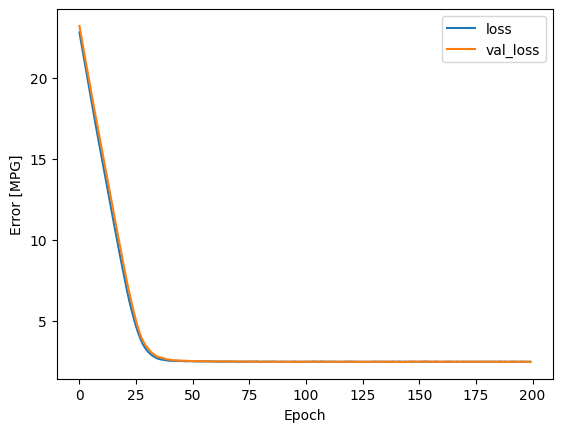

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

### TODO 4-3
1. `evaluate` the model on test data (`x_test` and `y_test`).

In [ ]:
# TODO:



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.4099


2.501807689666748

### TODO 5-1
1. Using `compile`, prepare your model to have `SGD` as an `optimizer` with `learning_rate` 0.3 and have a loss function to be `mean_absolute_error`.

In [ ]:
# TODO:




### TODO 5-2
1. Using `fit`, train the model with training data (`x_train` and `y_train`). Train the model for `300 epochs` keeping `verbose` turned off (0), and `validation_split` be 20%.

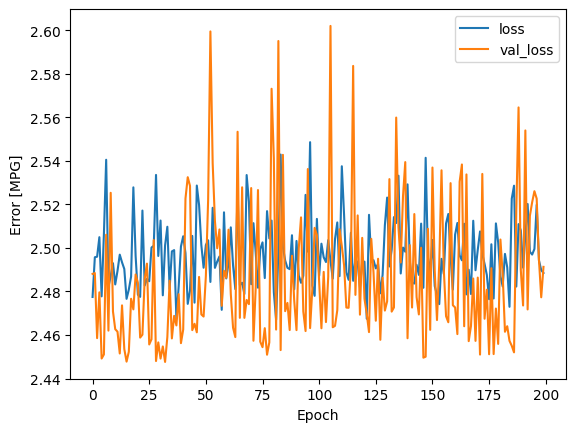

### TODO 5-3
1. `evaluate` the model on test data (`x_test` and `y_test`).
2. Explain the difference between both the linear models (One with `learning_rate = 0.1` and Other with `learning_rate = 0.3`)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.4229


2.5140833854675293

A higher learning rate allows the model to learn faster, but it may also lead to overshooting the optimal solution. On the other hand, a lower learning rate may lead to slower convergence, but it can be more precise in finding the optimal solution.
Therefore, in the context of linear models, such as linear regression or linear networks, the difference between using a learning rate of 0.1 and 0.3 would typically manifest in the speed of convergence and the stability of the training process. A higher learning rate (e.g., 0.3) may lead to faster initial progress during training, but it could also lead to instability or overshooting the optimal solution. Conversely, a lower learning rate (e.g., 0.1) may lead to slower but more stable convergence.

## Going Deep

### TODO 6
1. Now  build a neural network `deep_model` with two hidden layers and one output layer as described below:
  1. The first layer of the model should be your `normalizer` as the `linear_model`, This layer normalizes the input data.
  1. Add two hidden layer ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) with 64 hidden units (neurons) and ReLU activation function for nonlinear transformation.
  1. Add a output layer that produces 1 output value.  
1. `compile` the model you have built keeping `SGD` as an `optimizer` with `learning_rate` 0.1 and have a loss function to be 'mean_absolute_error'.
1. Now traing the model using `fit`. You can refer to the trainig cell for `linear_model` if need.
1. Evaluate the model with test data.

In [ ]:
# TODO:














/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Note: Learning rate:
The learning rate determines how fast the optimizer will adjust the weights and can be an important hyperparameter to tune. A lower learning rate may result in a more accurate model but will take longer to train, while a higher learning rate may train faster but may diverge. After building the network, you can play with it see how well it learns with a specific learning rate.


In [ ]:
%%time
# measuring training time

# TODO:









CPU times: user 24.2 s, sys: 865 ms, total: 25.1 s
Wall time: 25.5 s


Now let us visualize the learning curve to observe how it learns.

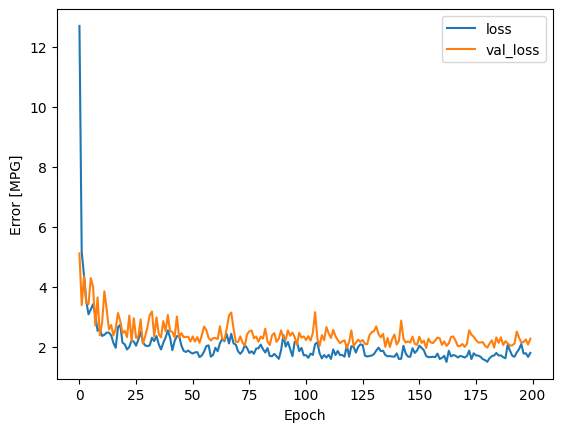

In [ ]:
#TODO:



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.3185


2.60821270942688

## Automatic Differentiation



Automatic differentiation is a fundamental technique used in neural networks for efficiently computing derivatives, particularly during the training process. It enables the calculation of gradients, which are essential for updating the model's parameters through techniques like gradient descent. The search results emphasize the significance of automatic differentiation in the context of backpropagation, which is the primary algorithm for training neural networks. By automating the process of computing derivatives, automatic differentiation streamlines the training of neural networks and plays a pivotal role in enabling efficient and effective optimization of model parameters. This technique is a cornerstone of modern deep learning and is widely utilized in various machine learning frameworks and libraries.

We can play with simple function $y=2x^2 + 3x$ and derive the first and second order derivatives as below:

In [ ]:
x = tf.range(5, dtype=tf.float32)
x = tf.Variable(x)

with tf.GradientTape() as gg:
    with tf.GradientTape() as g:
        y = 2*x*x + 3*x   ## (A)
    dy_dx = g.gradient(y, x)
d2y_d2x = gg.gradient(dy_dx, x)


The first derivative is $y^\prime = 4x+3$ so the evaluation for $x = {0,1,2,3,4}$ should match.  

In [ ]:
dy_dx


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 3.,  7., 11., 15., 19.], dtype=float32)>

Let us check the second order $y^{\prime \prime} = 4$ now for $x = {0,1,2,3,4}$.

In [ ]:
d2y_d2x

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([4., 4., 4., 4., 4.], dtype=float32)>

### TODO 7
1. Define your own function $y$. Refering the code above, compute first order derivative and validate automatic differentiation with the example inputs $x={0,1,2,3,4}.

In [ ]:
# TODO:








<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 0.,  4.,  8., 12., 16.], dtype=float32)>

## Loading Data

### Iris Dataset

You can download [iris.data](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). Click the link and take a look at the data before starting to work the following TODOs.


<img src="https://archive.ics.uci.edu/static/public/53/Thumbnails/Large.jpg?124" width=300 />


|  |  |  |  |  |  |
|---|---|---|---|---|---|
| Data Set Characteristics:&nbsp;&nbsp; | Multivariate | Number of Instances: | 150 | Area: | Life |
| Attribute Characteristics: | Real | Number of Attributes: | 4 | Date Donated | 1988-07-01 |
| Associated Tasks: | Classification | Missing Values? | No | Number of Web Hits: | 5114202 |



The dataset contains the following attributes:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
  * Iris Setosa
  * Iris Versicolour
  * Iris Virginica

Given the other attributes as input feature, we can train the model to classify the three classes.


### TODO 8
1. Copy the iris.data url from above and define the variable `data_url`.
1. Load the iris dataset with the `data_url` provided above and store the output into `dfiris` using pandas `read_csv`.
    1. Hint: Make sure to include the data url variable.
    1. Hint: Use the read_csv reference here: [link](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
    1. Hint: Include colnames when loading the data.

In [ ]:
# TODO:








# display the dfdauto
display(dfiris)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### TODO 8-1

1. Convert the column 'class' to dummy variables.
    1. Hint: Don't forget to use prefix and prefix seperator to have same column names. You can find detailed documentation here: [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)


In [ ]:
# TODO:







,sepal length,sepal width,petal length,petal width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## Visualize the data
 Seaborn, a visualization library, helps to visualize data with many plotting functions. To understand how variables in a dataset are related to one another and how that relationship is dependent on other variables, we can run visual analysis. This helps to visualize the trends and identify various patterns in the dataset.

## Why Pairplot
  The Iris dataset consists of four features (sepal length, sepal width, petal length, and petal width) and three classes of iris flowers (setosa, versicolor, and virginica). In the context of building a linear classifier, you might want to explore the relationships between these features and how well they can distinguish between the three classes.

Here's why you might use a pair plot with the Iris dataset:

Visualizing Class Separation: A pair plot allows you to visualize the scatterplots between pairs of features, with different colors for each class. This helps you see how well the features separate the classes. For example, you might observe that certain pairs of features result in better separation between the three types of iris flowers.

Identifying Feature Importance: You can use the pair plot to identify which features contribute the most to the separation between classes. This information is valuable when building a linear classifier, as it helps you select the most relevant features.

Checking for Linear Relationships: Since you are building a linear network, you are assuming a linear relationship between the features and the classes. The pair plot allows you to check whether a linear separation is reasonable or if more complex models might be necessary.

### TODO 2
1. Using the seaborn `pairplot` plot, visualize the relationship between the independent varaibles.
  * Here, we want to plot distributions of each class, so use `dfiris`, the one without dummy variables, NOT `df_data`.  
  * HINT: use `hue` to produce the same figure.

2. What does this pairplot tell you?
  * HINT: Plot it and use the axes to determine the relationship
  

  

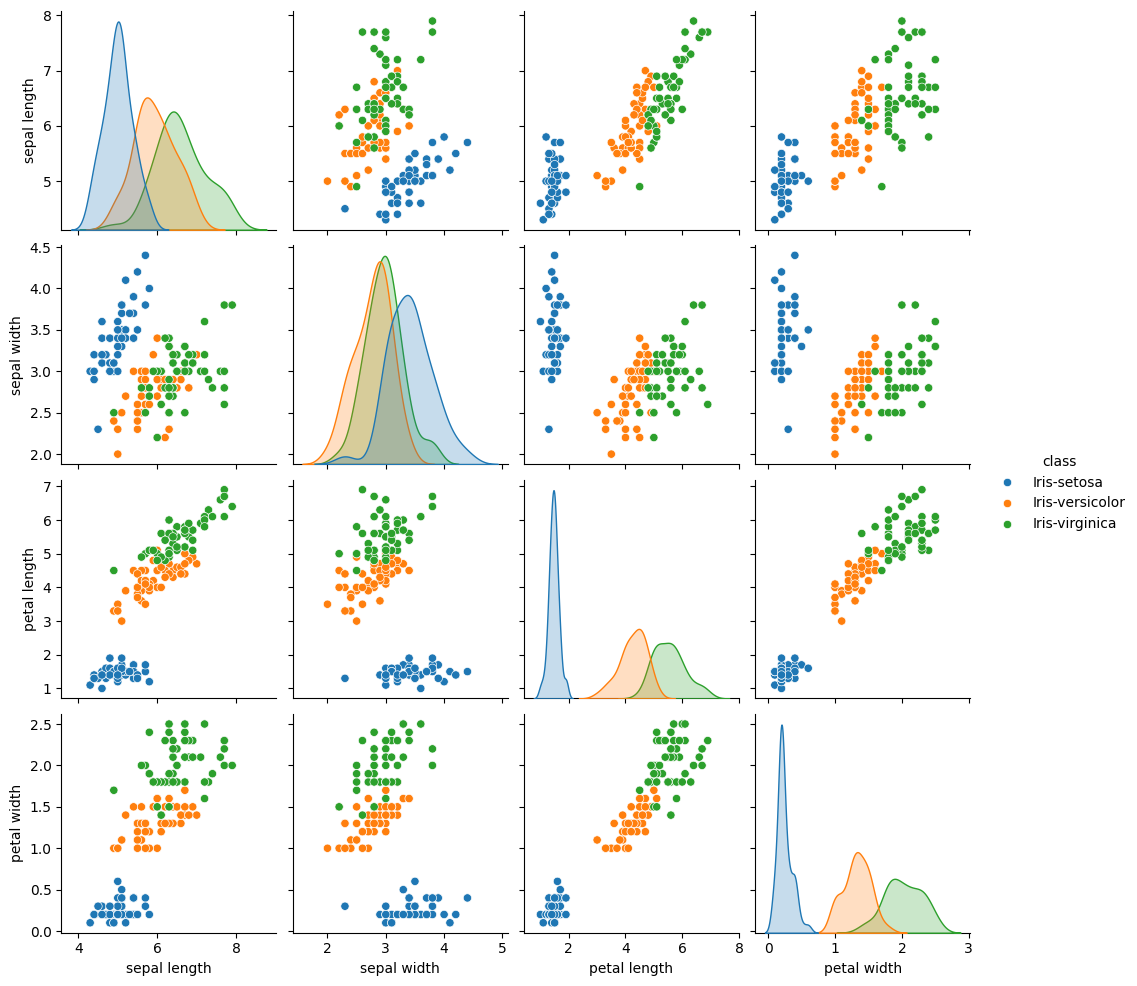

In [ ]:
# TODO: you code here


## Data Split




Now we have to split the training and testing data because it allows us to estimate the model's performance on new data and ensure that the model is not overfitting, which is when a model performs well on the training data but poorly on new data. By evaluating the model's performance on unseen data, we can get a better understanding of how well the model will perform when used in practice.


### TODO 9
1.Split the data now into 20% for testing and 80% for training, and used the previous lab code file as a reference.
1. Slice the label class to create `x_train`, `x_test`, `y_train`, and `y_test`.


In [ ]:
train_data

,sepal length,sepal width,petal length,petal width,Iris-setosa,Iris-versicolor,Iris-virginica
114,5.8,2.8,5.1,2.4,0,0,1
62,6.0,2.2,4.0,1.0,0,1,0
33,5.5,4.2,1.4,0.2,1,0,0
107,7.3,2.9,6.3,1.8,0,0,1
7,5.0,3.4,1.5,0.2,1,0,0
...,...,...,...,...,...,...,...
57,4.9,2.4,3.3,1.0,0,1,0
131,7.9,3.8,6.4,2.0,0,0,1
65,6.7,3.1,4.4,1.4,0,1,0
32,5.2,4.1,1.5,0.1,1,0,0


In [ ]:
x_train = train_data.iloc[:, :4].copy()
x_test = test_data.iloc[:, :4].copy()

y_train = train_data.iloc[:, 4:].copy()
y_test = test_data.iloc[:, 4:].copy()

In [ ]:
display(x_train)
display(x_test)
display(y_train)
display(y_test)

,sepal length,sepal width,petal length,petal width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
...,...,...,...,...
57,4.9,2.4,3.3,1.0
131,7.9,3.8,6.4,2.0
65,6.7,3.1,4.4,1.4
32,5.2,4.1,1.5,0.1


,sepal length,sepal width,petal length,petal width
9,4.9,3.1,1.5,0.1
14,5.8,4.0,1.2,0.2
19,5.1,3.8,1.5,0.3
21,5.1,3.7,1.5,0.4
25,5.0,3.0,1.6,0.2
29,4.7,3.2,1.6,0.2
36,5.5,3.5,1.3,0.2
39,5.1,3.4,1.5,0.2
47,4.6,3.2,1.4,0.2
49,5.0,3.3,1.4,0.2


,Iris-setosa,Iris-versicolor,Iris-virginica
114,0,0,1
62,0,1,0
33,1,0,0
107,0,0,1
7,1,0,0
...,...,...,...
57,0,1,0
131,0,0,1
65,0,1,0
32,1,0,0


,Iris-setosa,Iris-versicolor,Iris-virginica
9,1,0,0
14,1,0,0
19,1,0,0
21,1,0,0
25,1,0,0
29,1,0,0
36,1,0,0
39,1,0,0
47,1,0,0
49,1,0,0


In [ ]:
df_data.describe().transpose()[['mean','std']]

,mean,std
sepal length,5.843333,0.828066
sepal width,3.054000,0.433594
petal length,3.758667,1.764420
petal width,1.198667,0.763161
Iris-setosa,0.333333,0.472984
Iris-versicolor,0.333333,0.472984
Iris-virginica,0.333333,0.472984


## Linear Networks

We use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) again to build a linear network. This time, we don't use normalizer as the data is reasonably scaled.

### TODO 10
1. Create `linear_model` using `Sequential` with `Input` and `Dense` layers. We need to make the linear model to produce 3 output values with softmax as activation function.
    1. Hint: The number of your independent variables will be the shape of your input.

    
Here's why we use softmax activation in the output layer:

Multiclass Classification:

    The Iris dataset has three classes of iris flowers: setosa, versicolor, and virginica. For a multiclass classification task like this, where the goal is to assign each input to one of multiple classes, the softmax activation function is suitable.
Output Probability Distribution:

    Softmax transforms the raw output values (logits) into a probability distribution over multiple classes. The output values represent the likelihood or probability of each class. The class with the highest probability is then chosen as the predicted class.
    
Normalized Probabilities:

    Softmax ensures that the output values sum to 1, making them interpretable as probabilities. Each output value represents the probability of the corresponding class. This normalization property is crucial when dealing with multiple classes.

Cross-Entropy Loss:

    Softmax activation is often paired with the categorical cross-entropy loss function, which is well-suited for multiclass classification problems. The cross-entropy loss measures the dissimilarity between the predicted probability distribution and the true distribution

In [ ]:
# TODO:








Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

### TODO 10-1
1. Using `compile`, prepare your model to have `SGD` as an `optimizer` with `learning_rate` 0.1 and have a loss function to be 'categorical_crossentropy' and metrics as `mean absolute error` and `accuracy`.

In [ ]:
# TODO:





### TODO 10-2
1. Using `fit`, train the model with training data (`x_train` and `y_train`). Train the model for `300 epochs` keeping `verbose` turned off (0), and `validation_split` be 20%.

In [ ]:
%%time

# TODO:







CPU times: user 29.8 s, sys: 957 ms, total: 30.8 s
Wall time: 31.1 s


### TODO 10-2.1

1. Create `plot_learning` function that plots the training and validation loss learning curve using the `history` argument. You can also refer to the previous lab session to complete this function.

In [ ]:
# TODO







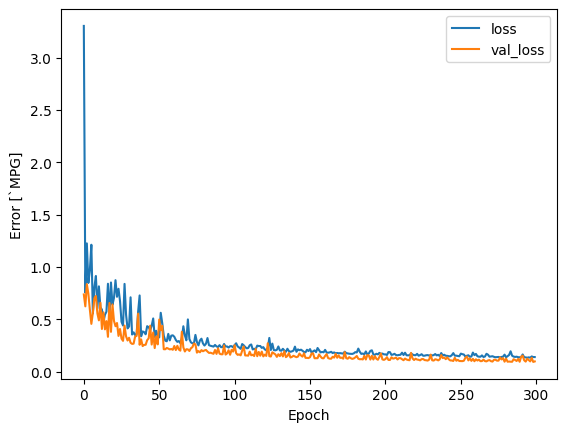

In [ ]:
#TODO



### TODO 10-3
1. `evaluate` the model on test data (`x_test` and `y_test`).

In [ ]:
# TODO:




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9333 - loss: 0.1274 - mae: 0.0647


[0.12744341790676117, 0.06469666212797165, 0.9333333373069763]

### TODO 11
1. Using `compile`, prepare your model to have `SGD` as an `optimizer` with `learning_rate` 0.1 and have a loss function to be 'categorical_crossentropy' and metric as`accuracy`. Include L1 and L2 Loss using `kernel_regularizer`
2. What is the difference between the above and the model `L1 and L2 Loss`?

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


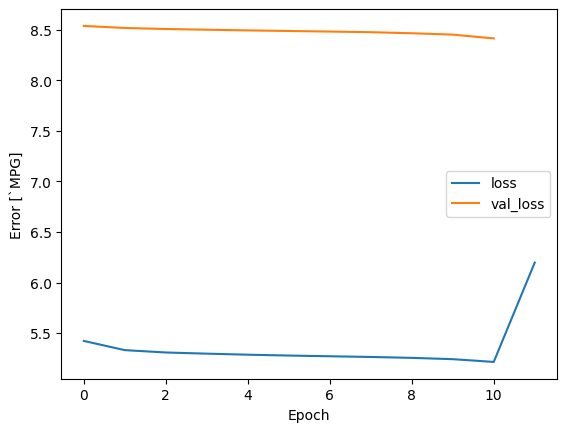

## Going Deep

### TODO 12
1. Now  build a neural network `deep_model` with hyperparameters given below:
  1. The first layer of the model should be your `Input` this should have the shape of no of independent variables.
  1. Add  hidden layer ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) with using `nHidden` hyperparameter variable and keep  'ReLU' as activation function for nonlinear transformation.
  1. Add a output layer that produces 3 output value use 'softmax' as activation function.  
1. `compile` the model you have built keeping `SGD` as an `optimizer` with `learning_rate` use `alpha` variable which is given as Hyperparameters and have a loss function to be 'categorical_crossentropy'.
1. Now train the model using `fit`. You can refer to the training cell for `linear_model` use `nEpoch` variable which is given as Hyperparameters .
1. Plot the learning curve using `plot_learning`.
1. Evaluate the model with test data.

In [ ]:
##### TODO: Hyperparameters
alpha = 0.01
nEpoch = 500
nHidden = 10
###################################################

# TODO:
deep_model =




# TODO



# TODO:




Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
%%time

# TODO:






CPU times: user 49.5 s, sys: 1.6 s, total: 51.1 s
Wall time: 53.4 s


Now let us visualize the learning curve to observe how it learns.

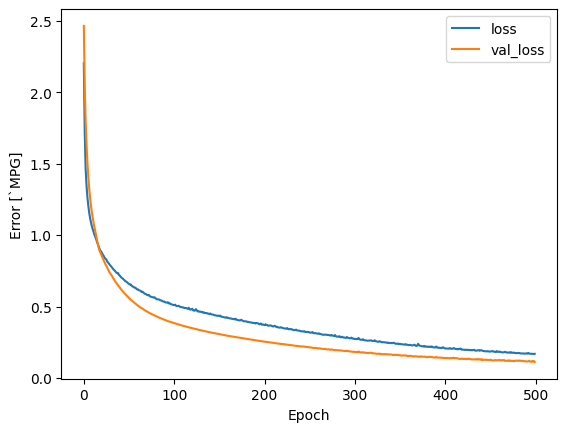

In [ ]:
# TODO


In [ ]:
#TODO:



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9667 - loss: 0.1614


[0.16141517460346222, 0.9666666388511658]

### TODO 13
1. Using `compile`, prepare your model to have `adam` as an `optimizer` with `learning_rate` 0.1 and have a loss function to be 'categorical_crossentropy' and metrics as `mean absolute error` and `accuracy`.

2. What difference do you find between `SGD` and `adam` ?



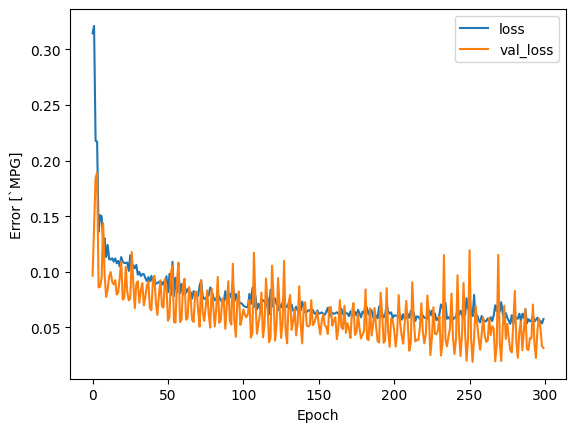